In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import sklearn.preprocessing
import sklearn.cluster

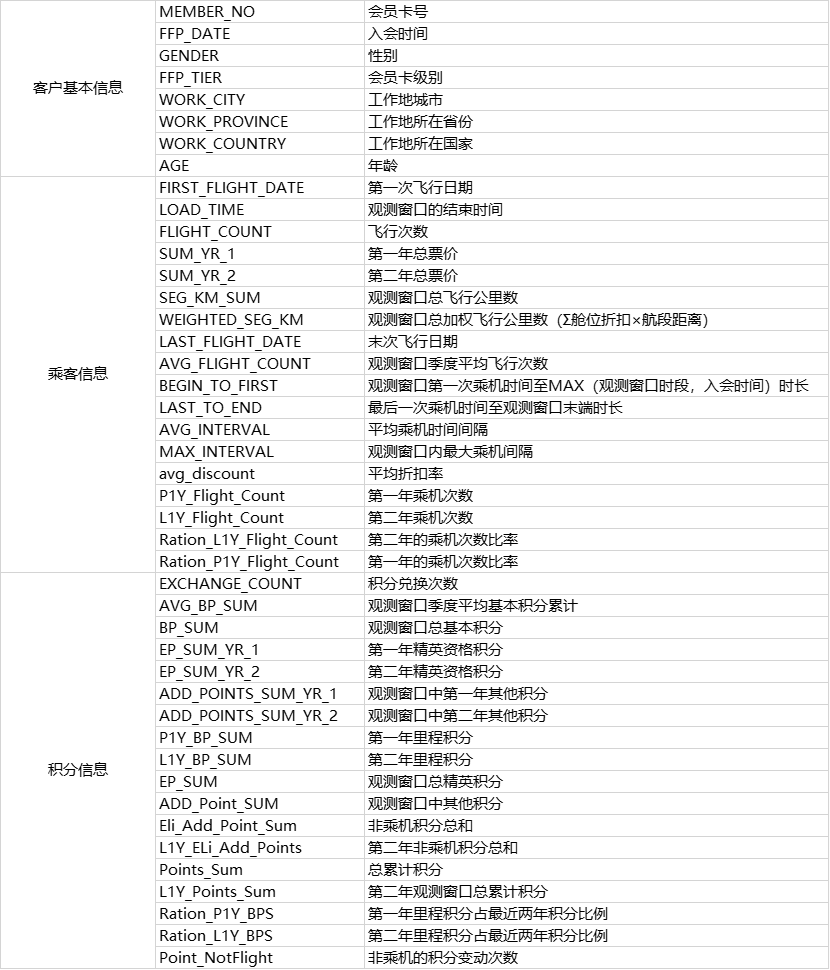

In [16]:
from IPython.display import Image, display

display(Image(filename='info.png'))

In [14]:
air_data_path = "./datasets/air_data.csv"
air_data = pd.read_csv(air_data_path)
air_data.shape

(62988, 44)

In [7]:
air_data.head(5)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,ADD_Point_SUM,Eli_Add_Point_Sum,L1Y_ELi_Add_Points,Points_Sum,L1Y_Points_Sum,Ration_L1Y_Flight_Count,Ration_P1Y_Flight_Count,Ration_P1Y_BPS,Ration_L1Y_BPS,Point_NotFlight
0,54993,2006/11/02,2008/12/24,男,6,.,北京,CN,31.0,2014/03/31,...,39992,114452,111100,619760,370211,0.509524,0.490476,0.487221,0.512777,50
1,28065,2007/02/19,2007/08/03,男,6,NaN,北京,CN,42.0,2014/03/31,...,12000,53288,53288,415768,238410,0.514286,0.485714,0.489289,0.510708,33
2,55106,2007/02/01,2007/08/30,男,6,.,北京,CN,40.0,2014/03/31,...,15491,55202,51711,406361,233798,0.518519,0.481481,0.481467,0.518530,26
3,21189,2008/08/22,2008/08/23,男,5,Los Angeles,CA,US,64.0,2014/03/31,...,0,34890,34890,372204,186100,0.434783,0.565217,0.551722,0.448275,12
4,39546,2009/04/10,2009/04/15,男,6,贵阳,贵州,CN,48.0,2014/03/31,...,22704,64969,64969,338813,210365,0.532895,0.467105,0.469054,0.530943,39


In [8]:
air_data.dtypes

MEMBER_NO                    int64
FFP_DATE                    object
FIRST_FLIGHT_DATE           object
GENDER                      object
FFP_TIER                     int64
WORK_CITY                   object
WORK_PROVINCE               object
WORK_COUNTRY                object
AGE                        float64
LOAD_TIME                   object
FLIGHT_COUNT                 int64
BP_SUM                       int64
EP_SUM_YR_1                  int64
EP_SUM_YR_2                  int64
SUM_YR_1                   float64
SUM_YR_2                   float64
SEG_KM_SUM                   int64
WEIGHTED_SEG_KM            float64
LAST_FLIGHT_DATE            object
AVG_FLIGHT_COUNT           float64
AVG_BP_SUM                 float64
BEGIN_TO_FIRST               int64
LAST_TO_END                  int64
AVG_INTERVAL               float64
MAX_INTERVAL                 int64
ADD_POINTS_SUM_YR_1          int64
ADD_POINTS_SUM_YR_2          int64
EXCHANGE_COUNT               int64
avg_discount        

In [10]:
missing_value = air_data.isnull().sum()
print(missing_value)

MEMBER_NO                     0
FFP_DATE                      0
FIRST_FLIGHT_DATE             0
GENDER                        3
FFP_TIER                      0
WORK_CITY                  2269
WORK_PROVINCE              3248
WORK_COUNTRY                 26
AGE                         420
LOAD_TIME                     0
FLIGHT_COUNT                  0
BP_SUM                        0
EP_SUM_YR_1                   0
EP_SUM_YR_2                   0
SUM_YR_1                    551
SUM_YR_2                    138
SEG_KM_SUM                    0
WEIGHTED_SEG_KM               0
LAST_FLIGHT_DATE              0
AVG_FLIGHT_COUNT              0
AVG_BP_SUM                    0
BEGIN_TO_FIRST                0
LAST_TO_END                   0
AVG_INTERVAL                  0
MAX_INTERVAL                  0
ADD_POINTS_SUM_YR_1           0
ADD_POINTS_SUM_YR_2           0
EXCHANGE_COUNT                0
avg_discount                  0
P1Y_Flight_Count              0
L1Y_Flight_Count              0
P1Y_BP_S

In [11]:
air_data.describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,EP_SUM_YR_1,EP_SUM_YR_2,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,...,ADD_Point_SUM,Eli_Add_Point_Sum,L1Y_ELi_Add_Points,Points_Sum,L1Y_Points_Sum,Ration_L1Y_Flight_Count,Ration_P1Y_Flight_Count,Ration_P1Y_BPS,Ration_L1Y_BPS,Point_NotFlight
count,62988.000000,62988.000000,62568.000000,62988.000000,62988.000000,62988.0,62988.000000,62437.000000,62850.000000,62988.000000,...,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000
mean,31494.500000,4.102162,42.476346,11.839414,10925.081254,0.0,265.689623,5355.376064,5604.026014,17123.878691,...,1355.006223,1620.695847,1080.378882,12545.7771,6638.739585,0.486419,0.513581,0.522293,0.468422,2.728155
std,18183.213715,0.373856,9.885915,14.049471,16339.486151,0.0,1645.702854,8109.450147,8703.364247,20960.844623,...,7868.477000,8294.398955,5639.857254,20507.8167,12601.819863,0.319105,0.319105,0.339632,0.338956,7.364164
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,368.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15747.750000,4.000000,35.000000,3.000000,2518.000000,0.0,0.000000,1003.000000,780.000000,4747.000000,...,0.000000,0.000000,0.000000,2775.0000,700.000000,0.250000,0.288889,0.258150,0.167954,0.000000
50%,31494.500000,4.000000,41.000000,7.000000,5700.000000,0.0,0.000000,2800.000000,2773.000000,9994.000000,...,0.000000,0.000000,0.000000,6328.5000,2860.500000,0.500000,0.500000,0.514252,0.476747,0.000000
75%,47241.250000,4.000000,48.000000,15.000000,12831.000000,0.0,0.000000,6574.000000,6845.750000,21271.250000,...,0.000000,345.000000,0.000000,14302.5000,7500.000000,0.711111,0.750000,0.815091,0.728375,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,0.0,74460.000000,239560.000000,234188.000000,580717.000000,...,984938.000000,984938.000000,728282.000000,985572.0000,728282.000000,1.000000,1.000000,0.999989,0.999993,140.000000
